In [25]:
import pandas as pd
import luv2wrangle as l2w
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
df = pd.read_csv("Ethiopia_final_female_dataset.csv")

In [58]:
df.shape

(112575, 48)

In [5]:
df.head(10)

,household_id2,individual_id2,region_code,zone_code,Highest_Grade_Completed,hh_member_relationship,sex_of_hh_member,age_of_hh_member,marital_status,hours_per_week_agg,...,amt_days_men_hired,daily_wage_per_man,amt_days_women_hired,daily_wage_per_woman,amt_days_children_hired,daily_wage_per_child,Did_You_sell_harvest_crop,value_of_Crop_sales,household_size,worry_enough_food_to_eat_weekly
0,10101088801601002,1.010109e+18,1,1,NaN,1,2,79,6.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,2,NaN,9,2
1,10101088801601002,1.010109e+18,1,1,NaN,1,2,79,6.0,0.0,...,4.0,80.0,2.0,80.0,0.0,NaN,1,550.0,9,2
2,10101088801601017,1.010109e+18,1,1,NaN,2,2,33,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,1,1850.0,9,2
3,10101088801601017,1.010109e+18,1,1,NaN,2,2,33,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,1,3850.0,9,2
4,10101088801601017,1.010109e+18,1,1,NaN,2,2,33,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,1,1850.0,9,2
5,10101088801601017,1.010109e+18,1,1,NaN,2,2,33,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,1,3850.0,9,2
6,10101088801601017,1.010109e+18,1,1,NaN,2,2,33,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,2,NaN,9,2
7,10101088801601017,1.010109e+18,1,1,NaN,2,2,33,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,1,3850.0,9,2
8,10101088801601017,1.010109e+18,1,1,NaN,2,2,33,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,2,NaN,9,2
9,10101088801601017,1.010109e+18,1,1,NaN,2,2,33,2.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,1,3850.0,9,2


###### Check for Null Values

In [14]:
df.isnull().sum()

household_id2                           0
individual_id2                          0
region_code                             0
zone_code                               0
Highest_Grade_Completed             64924
hh_member_relationship                  0
sex_of_hh_member                        0
age_of_hh_member                        0
marital_status                      32117
hours_per_week_agg                  21344
hours_per_week_other_jobs           21344
hours_per_week_collect_water        21344
pw_w3                                   0
bank_account                        59658
field_id                                0
Num_of_Hired_Men                    28093
Num_of_Hired_Women                  28089
Use_Fertilizer                      28424
Use_Manure_Fertilizer               64319
crop_name                               0
crop_code                               0
Type_of_Planting                        0
Amount_of_field_planted             81147
chemical_fertilizers_used         

###### Dealing with Null Values

1. We have a lot of null values in our dataset.
2. We have 112,000 rows, so if it is over half I think we should just remove it.
3. The only one over half I didn't remove is the value of crop sales because this might be important in assessing productivity. We can impute values for this but we'll have to note that. Let me know what you think.

In [18]:
remove_cols = ["bank_account","Use_Manure_Fertilizer ","Amount_of_field_planted","reason_no_chemicals_used ","daily_wage_per_man","daily_wage_per_woman","daily_wage_per_child "]

In [20]:
newdf = df.drop(remove_cols, axis=1, errors = "ignore")

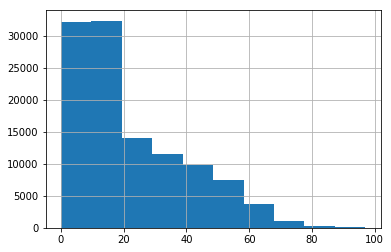

In [26]:
df["age_of_hh_member"].hist()

###### Our age variable is skewed towards younger individuals

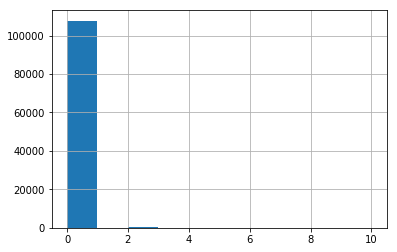

In [29]:
df["amt_days_children_hired"].hist()

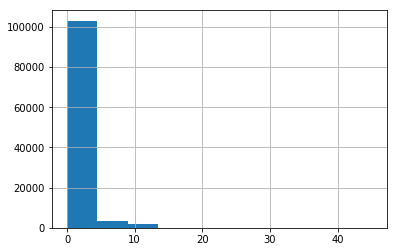

In [31]:
df['amt_days_men_hired'].hist()

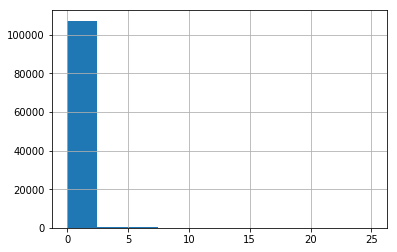

In [34]:
df["amt_days_women_hired"].hist()

###### Anyone can make sense of this? What are these variables saying? Are they saying these are the amount of days that a hire was made or the amount of individuals hired in a day?

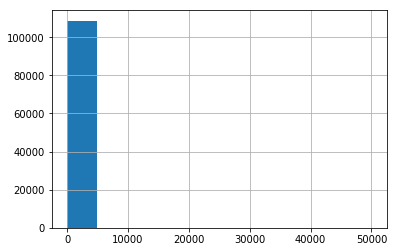

In [37]:
df["amt_of_crop_harvest"].hist()

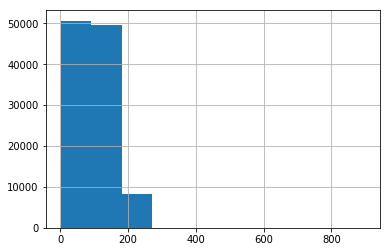

In [38]:
df["amt_of_crop_harvest_units"].hist()

###### These probably need to be scaled. 

There are values such as 0.5 and then others like 300.

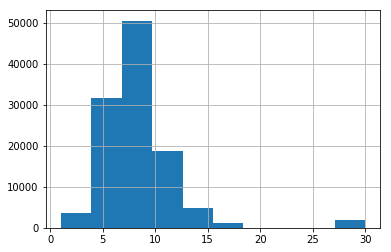

In [40]:
df["household_size"].hist()

In [44]:
df["sex_of_hh_member"].nunique()

1

In [45]:
df.columns

Index(['household_id2', 'individual_id2', 'region_code', 'zone_code',
       'Highest_Grade_Completed', 'hh_member_relationship', 'sex_of_hh_member',
       'age_of_hh_member', 'marital_status', 'hours_per_week_agg',
       'hours_per_week_other_jobs', 'hours_per_week_collect_water', 'pw_w3',
       'bank_account', 'field_id', 'Num_of_Hired_Men', 'Num_of_Hired_Women',
       'Use_Fertilizer', 'Use_Manure_Fertilizer', 'crop_name', 'crop_code',
       'Type_of_Planting', 'Amount_of_field_planted',
       'chemical_fertilizers_used', 'reason_no_chemicals_used',
       'extension_program', 'Credit_Services', 'advisory_Services',
       'Crop_Rotation', 'who_in_charge_of_crops', 'who_decides_crops_2_sell',
       'who_takes_care_of_Crops', 'who_decides_on_use_of_income',
       'who_decides_on_use_of_crops', 'who_buys_agg_supplies',
       'did_you_harvest_crop_from_field', 'amt_of_crop_harvest',
       'amt_of_crop_harvest_units', 'amt_days_men_hired', 'daily_wage_per_man',
       'amt_day

In [49]:
df["hours_per_week_agg"].describe()

count    91231.000000
mean         9.038233
std         14.228193
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max         86.000000
Name: hours_per_week_agg, dtype: float64

In [50]:
df["hours_per_week_collect_water"].describe()

count    91231.000000
mean         1.591192
std          4.906424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         84.000000
Name: hours_per_week_collect_water, dtype: float64

In [51]:
df["hours_per_week_other_jobs"].describe()

count    91231.000000
mean         0.292554
std          2.772719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         56.000000
Name: hours_per_week_other_jobs, dtype: float64

###### Our data contains numerical data that is really categorical.

1. We will have to convert the necessary columns
2. Need to one-hot encode
3. Considering two approaches:

     3a. We can predict the number of days worked for females as a continuous value

    3b. We can predict discrete values (which would need to be considered as categorical, maybe)
    

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112575 entries, 0 to 112574
Data columns (total 48 columns):
household_id2                      112575 non-null int64
individual_id2                     112575 non-null float64
region_code                        112575 non-null int64
zone_code                          112575 non-null int64
Highest_Grade_Completed            47651 non-null float64
hh_member_relationship             112575 non-null int64
sex_of_hh_member                   112575 non-null int64
age_of_hh_member                   112575 non-null int64
marital_status                     80458 non-null float64
hours_per_week_agg                 91231 non-null float64
hours_per_week_other_jobs          91231 non-null float64
hours_per_week_collect_water       91231 non-null float64
pw_w3                              112575 non-null float64
bank_account                       52917 non-null float64
field_id                           112575 non-null int64
Num_of_Hired_Men        

In [54]:
remove_cols = ["bank_account","Use_Manure_Fertilizer ","Amount_of_field_planted","reason_no_chemicals_used ","daily_wage_per_man","daily_wage_per_woman","daily_wage_per_child ", "amt_days_men_hired", "amt_days_women_hired", "amt_days_children_hired", "sex_of_hh_member"]
newdf = df.drop(remove_cols, axis=1, errors = "ignore")

In [56]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112575 entries, 0 to 112574
Data columns (total 40 columns):
household_id2                      112575 non-null int64
individual_id2                     112575 non-null float64
region_code                        112575 non-null int64
zone_code                          112575 non-null int64
Highest_Grade_Completed            47651 non-null float64
hh_member_relationship             112575 non-null int64
age_of_hh_member                   112575 non-null int64
marital_status                     80458 non-null float64
hours_per_week_agg                 91231 non-null float64
hours_per_week_other_jobs          91231 non-null float64
hours_per_week_collect_water       91231 non-null float64
pw_w3                              112575 non-null float64
field_id                           112575 non-null int64
Num_of_Hired_Men                   84482 non-null float64
Num_of_Hired_Women                 84486 non-null float64
Use_Fertilizer         